**Gordon Doore Ghailan Fadah**

Fall 2023

CS 343: Neural Networks

Project 2: Multi-layer Perceptrons

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# for obtaining the STL-dataset
import load_stl10_dataset

# for preprocessing dataset
import preprocess_data

# Set the color style so that Professor Layton can see your plots
plt.show()
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 2: Implement single layer network to test softmax activation and cross-entropy loss

You will first implement and test out the softmax activation and cross-entropy loss in a single layer net before embedding it in a more complex multi-layer network.

### 2a. Load in preprocessed STL-10 data

Use your automated preprocessing function to load in the STL-10 data in the following split:
- 3000 training samples
- 750 test samples
- 1000 validation samples
- 250 samples for development

In [2]:
stl_labels = np.load("numpy/labels.npy")
stl_imgs = np.load("numpy/images.npy")
stl_imgs_pp, stl_labels_pp = preprocess_data.preprocess_stl(stl_imgs, stl_labels)

x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(stl_imgs_pp, stl_labels_pp,3000,750,1000,250) 

### 2b. Implement the following functions

In `softmax_layer.py`, implement the following methods in the base class `SoftmaxLayer`:

- `fit`
- `net_in`
- `predict`
- `one_hot`
- `accuracy`
- `activation` (softmax) $f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^C e^{x_j}}$ where $x_i$ are the "net in" values and there are $C$ output neurons (one per input class). $f(x_i)$ is the activation values of each output neuron $i$. Since this is softmax, it is the probability that a given input belongs to the class $i$ coded by the output neuron.
- `loss` (cross-entropy) $L(x_m) = -\frac{1}{B}\sum_{b=1}^B{Log \left (\frac{e^{x_m}}{\sum_{n=1}^C e^{x_n}}\right )}$. $m$ is the correct class for the $b^{th}$ input. $x_m$ is the output neuron activation for the correct class, $x_n$ is the output neuron activation for all of the classes (in the sum). The batch size is $B$, so the loss is averaged over each mini-batch of inputs. The expression in the $Log$ is just the softmax.
- `gradient` (for softmax/cross-entropy)

You're welcome to work in any order, but I recommend starting with `fit` because as you work though it, you should recognize why we need most of the other methods. You can finish `fit` or branch off as you need the other methods.

### 2c. Test key functions

In [3]:
from softmax_layer import SoftmaxLayer

In [4]:
# Let's generate some small Gaussian weights equal to the length of an image feature vector
np.random.seed(0)
randWts = np.random.normal(loc=0, scale=0.01, size=(x_dev.shape[1], 10))
b = 1
softmaxNet = SoftmaxLayer(-1)

# Fake data for consistent debugging
test_imgs = np.random.random(size=(15, x_dev.shape[1])) - 0.5
test_labels = np.random.randint(low=0, high=6, size=(15,))

#### Test the `onehot` function

In [5]:
y_test1 = np.array([1, 2, 2, 0, 1, 3])
c_test = 4
y_one_hot = softmaxNet.one_hot(y_test1, c_test)
print(f'Your one hot vectors:\n{y_one_hot}')

Your one hot vectors:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


Your one hot vectors should look like:

    [[0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 1. 0.]
     [1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 0. 1.]]

#### Test the `loss`,  `net_in`, softmax `activation` functions

In [6]:
lossNoReg, lossReg = softmaxNet.test_loss(randWts, b, test_imgs, test_labels)
print(f'The loss (without regularization) is {lossNoReg:.2f} and it should approx be 2.37')
print(f'The loss (with 0.5 regularization) is {lossReg:.2f} and it should approx be 3.13')

net in shape=(15, 10), min=0.6770080064951228, max=1.4469478863251897
Should be
net in shape=(15, 10), min=0.6770080064951229, max=1.4469478863251897

net act shape=(15, 10), min=0.0688478818744139, max=0.1502037762718014
Should be
net act shape=(15, 10), min=0.0688478818744139, max=0.15020377627180137

The loss (without regularization) is 2.37 and it should approx be 2.37
The loss (with 0.5 regularization) is 3.13 and it should approx be 3.13


#### Test the `gradient` function

In [7]:
grad_wts, grad_b = softmaxNet.test_gradient(randWts, b, test_imgs, test_labels, 10)

print(f'1st few Wt gradient values are {grad_wts[:4,0]}\nand should be                  [-0.012  0.003  0.025 -0.023] ')
print(f'1st few Wt bias values are {grad_b[:4]}\nand should be              [-0.101 -0.099 -0.037  0.101]')


net in: (15, 10), 0.6770080064951228, 1.4469478863251897
net in 1st few values of 1st input are:
[0.864 0.927 0.874 1.159 1.392]
and should be
[0.864 0.927 0.874 1.159 1.392]
net act 1st few values of 1st input are:
[0.078 0.083 0.079 0.105 0.132]
and should be
[0.078 0.083 0.079 0.105 0.132]
y one hot: (15, 10), sum is 15.0.
You should know what the sum should be :)
1st few Wt gradient values are [-0.012  0.003  0.025 -0.023]
and should be                  [-0.012  0.003  0.025 -0.023] 
1st few Wt bias values are [-0.101 -0.099 -0.037  0.101]
and should be              [-0.101 -0.099 -0.037  0.101]


#### Test `fit` function

In [8]:
np.random.seed(0)
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250)


epoch: 0 ------ loss: 2.4412779995561347
epoch: 100 ------ loss: 2.1674888657666807
epoch: 200 ------ loss: 2.025404278818754
epoch: 300 ------ loss: 1.9186761501268867
epoch: 400 ------ loss: 1.9096141487371172
epoch: 500 ------ loss: 1.808747171302267


Given the random mini-batch sampling process, you may get different specific numbers, but the loss should generally decrease over iterations. You should get something like this:

```
Starting to train network...There will be 600 epochs and 600 iterations total, 1 iter/epoch.
  Completed iter 0/600. Training loss: 2.46.
  Completed iter 100/600. Training loss: 2.16.
  Completed iter 200/600. Training loss: 2.02.
  Completed iter 300/600. Training loss: 1.91.
  Completed iter 400/600. Training loss: 1.92.
  Completed iter 500/600. Training loss: 1.80.
Finished training!
```

##### Plot the loss

It should look noisy, but decrease on average.

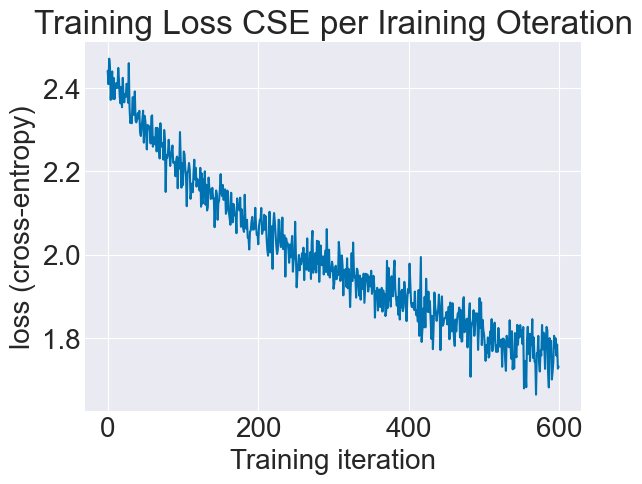

In [9]:
def plot_cross_entropy_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Training iteration')
    plt.ylabel('loss (cross-entropy)')
    plt.title("Training Loss CSE per Iraining Oteration")
    plt.show()
    
plot_cross_entropy_loss(loss_history)

### 2d. Questions

**Question 1.** What do you think the decrease in loss over the epochs tells us about the state of the training process? How is current training going? What's the future potential like?

**Question 2.** Below, write code to test regularization with training: check to make sure that the loss starts at ~154 for `reg=100`. Once you get this working, play around with the regularization parameter. You can drastically change the magnitude, but it should always remain nonnegative. How does regularization affect the training loss and **why**?

**Question 3.** Play around with the batch size parameter. How does this affect the training loss and **why**? (*Think about the error gradient and how the weights change*)

**Answer 1:**  It looks like there could be a little bit more reduction in loss, but we are pretty close to as good as we are going to get here.

### Changing Regularization

#### Reg = 100

epoch: 0 ------ loss: 154.12590979360425
epoch: 100 ------ loss: 153.89380692934776
epoch: 200 ------ loss: 154.22775756902627
epoch: 300 ------ loss: 154.95335235490558
epoch: 400 ------ loss: 156.11744548904878
epoch: 500 ------ loss: 157.52981884058127


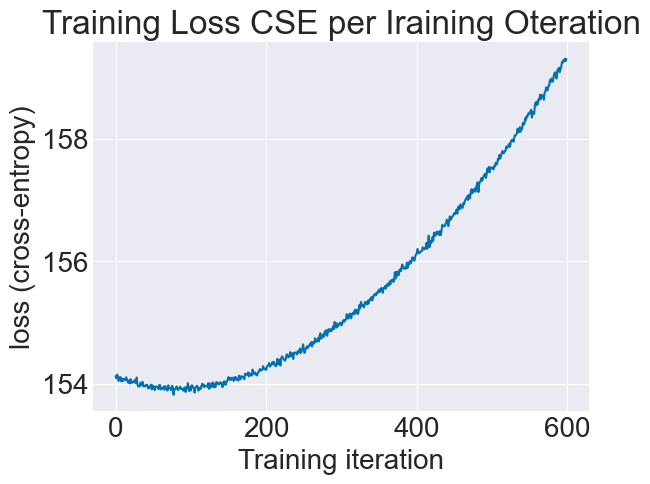

In [10]:
np.random.seed(0)

softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250, reg = 100)

plot_cross_entropy_loss(loss_history)



#### Reg = 30

epoch: 0 ------ loss: 47.94666753777057
epoch: 100 ------ loss: 47.64030733320649
epoch: 200 ------ loss: 47.521347761055765
epoch: 300 ------ loss: 47.4686756191766
epoch: 400 ------ loss: 47.5376437839318
epoch: 500 ------ loss: 47.53536664410277


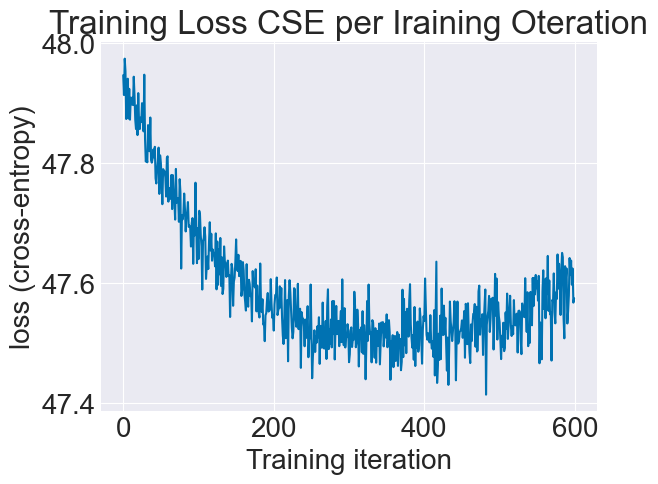

In [11]:
np.random.seed(0)

softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250, reg = 30)

plot_cross_entropy_loss(loss_history)


#### Reg = 10

epoch: 0 ------ loss: 17.609741178960945
epoch: 100 ------ loss: 17.323238240782807
epoch: 200 ------ loss: 17.184838035263375
epoch: 300 ------ loss: 17.089926864845495
epoch: 400 ------ loss: 17.098481981633682
epoch: 500 ------ loss: 17.019892134964646


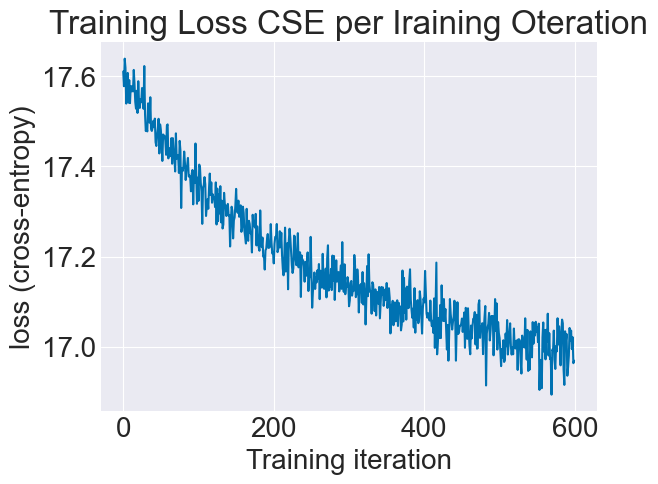

In [12]:
np.random.seed(0)

softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250, reg = 10)

plot_cross_entropy_loss(loss_history)

#### Reg = 3

epoch: 0 ------ loss: 6.991816953377578
epoch: 100 ------ loss: 6.71409534795969
epoch: 200 ------ loss: 6.572924368231671
epoch: 300 ------ loss: 6.469475437264805
epoch: 400 ------ loss: 6.4653578752366405
epoch: 500 ------ loss: 6.370759526516938


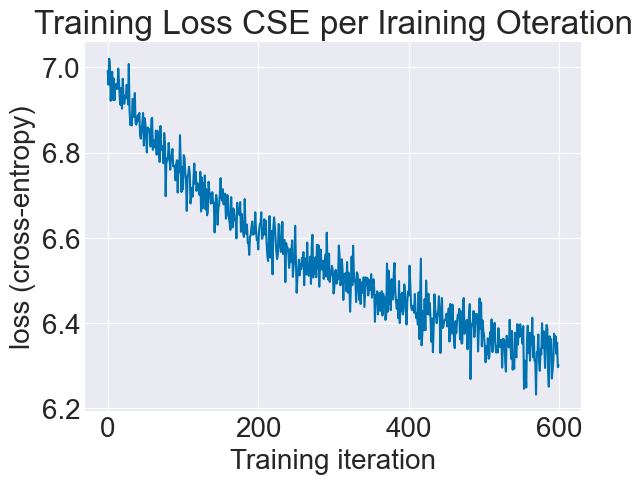

In [13]:
np.random.seed(0)

softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250, reg = 3)

plot_cross_entropy_loss(loss_history)

#### Reg = 0.5

epoch: 0 ------ loss: 3.1997011585263753
epoch: 100 ------ loss: 2.9252511739507394
epoch: 200 ------ loss: 2.783312274099895
epoch: 300 ------ loss: 2.677122907076649
epoch: 400 ------ loss: 2.668875985388782
epoch: 500 ------ loss: 2.5690436324083445


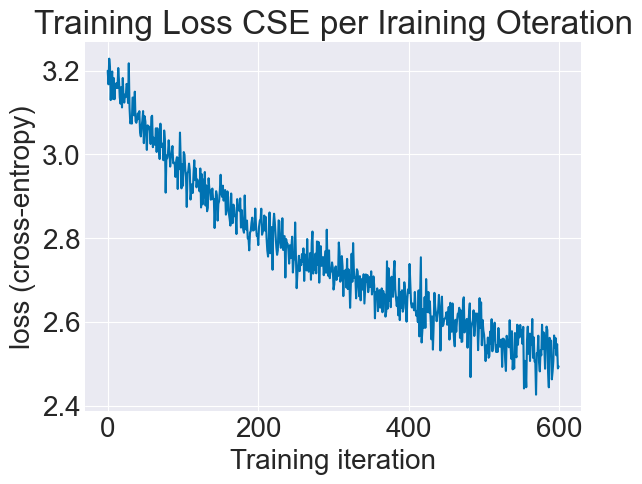

In [14]:
np.random.seed(0)

softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250, reg = 0.5)

plot_cross_entropy_loss(loss_history)

**Answer 2:**  We see that with regularization, for large values, the model cannot train properly.  This is because we are essentially asking our update rule to something impossible.  For large values of reg, we must penalize large weights more, and thus increase our loss on a scale beyond a reasonable loss value.  Having higher weight values can be associated with overtraining, but the model needs to be able to distinguish between features using larger weights, and larger than reasonable regularization values make this more difficult since it scales our loss according to even the smallest differentiation.

### Changing (mini) Batch Size

#### Base Case: mini_batch_size = 250

epoch: 0 ------ loss: 2.4731599815291334
epoch: 100 ------ loss: 2.179523021077032
epoch: 200 ------ loss: 2.050824462791266
epoch: 300 ------ loss: 1.9161970421305123
epoch: 400 ------ loss: 1.8344241364910314
epoch: 500 ------ loss: 1.7534674471367813


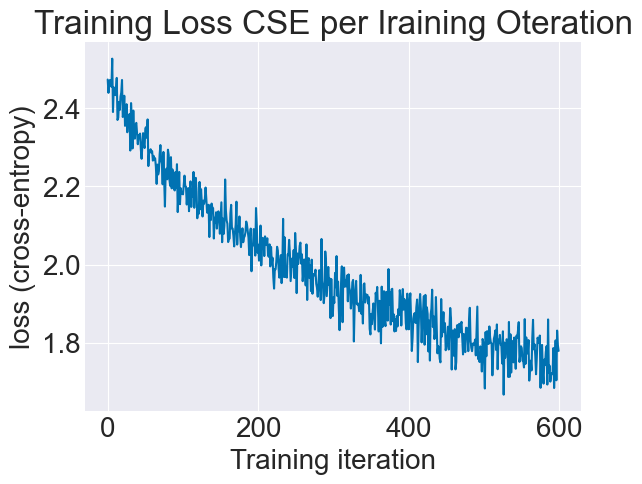

In [15]:
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=250)

plot_cross_entropy_loss(loss_history)

#### mini_batch_size = 150

epoch: 0 ------ loss: 2.515387907377464
epoch: 100 ------ loss: 2.208190651809605
epoch: 200 ------ loss: 2.012904118259861
epoch: 300 ------ loss: 1.8656202598714717
epoch: 400 ------ loss: 1.8865718036784658
epoch: 500 ------ loss: 1.7890519115536474


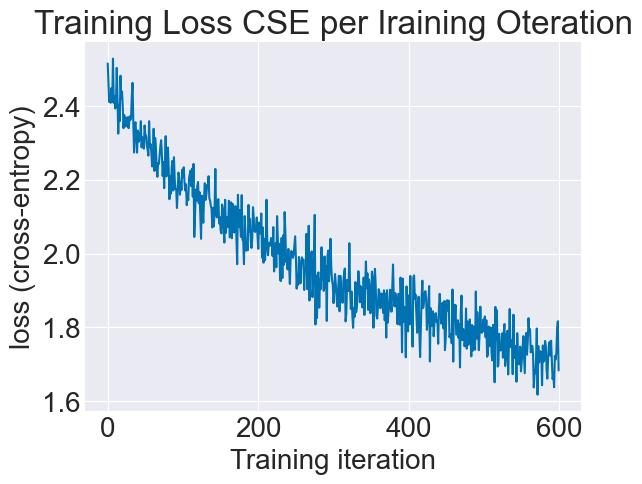

In [16]:
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=150)

plot_cross_entropy_loss(loss_history)

#### mini_batch_size = 50

epoch: 0 ------ loss: 2.4286314307976515
epoch: 100 ------ loss: 1.7823661375703446
epoch: 200 ------ loss: 1.5813419705029839
epoch: 300 ------ loss: 1.2948849189753566
epoch: 400 ------ loss: 1.207351770101032
epoch: 500 ------ loss: 1.2275582010230264


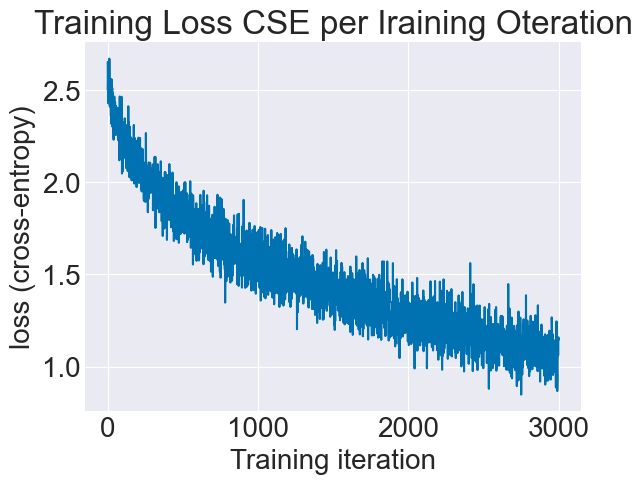

In [17]:
softmaxNet = SoftmaxLayer(10)
loss_history = softmaxNet.fit(x_dev, y_dev, n_epochs=600, mini_batch_sz=50)

plot_cross_entropy_loss(loss_history)

**Answer 3:**  We can see that as mini-batch size is reduced, our loss goes down faster.  The reason for this is that we are updating weights after each batch is passed through the network.  If the batches represent the data as a whole well, the network will learn faster because it will get more weight updates per epoch.

### 2e. Train and optimize STL-10 dataset performance

As you've surely noticed, hyperparameters can drastically affect learning! 


Implement a grid search for the best **combinations** of hyperparameters

- learning rate,
- regularization
- batch size 

Fix the training duration to `75` epochs.

The grid search process should:

1. Fit the model with specific values of hyperparameters that we're testing (using the training set).
2. Compute the accuracy on the **training set**. 
3. Compute the accuracy on the **validation set.** 
4. Print out and record the best parameter combination as you go (that *improves* the **validation set accuracy**).
5. Wipe the weights clean (reinitialize them) every time you try new parameters. It's easiest just to create a new net object on each run.

#### Suggestions

This can take quite a bit of simulation time! Here are some tips:
- I suggest using a coarse-to-fine search strategy. Try varying hyperparameters over many orders of magnitude, then follow up with a 2nd search that "zooms in" around the hyperparameters that gave you the best results from the first search, as determined by your print outs. You can be informal about this and hard-code the coarse and fine hyperparameter choices. Abort searches prematurely if you feel there aren't productive (no reason to wait!). This can take however long or short that you want to dedicate. Remember, you are printing out the best parameter values on each run, so you can always just proceed with those.
- You should be able to achieve ~30% accuracy without too much effort (10% is chance performance).
- High learning rates don't really make sense. You'll know if your value is "high" if numpy complains about numerical issues.
- Your mini-batch sizes should be `<= N` and `>= 1`.
- Time single network runs with a few different batch sizes you plan on trying in your big search. This will help you figure out a ballpark estimate how long grid search will take (*you can decide whether to go eat dinner, run it overnight, etc.*). If it will take an unreasonable amount of time, reduce the number of parameters you try in one search.
- Think about whether you need *3 nested loops* or *a sequence of single loops*.
- Turn off print outs from `fit` (adjust `verbose` argument) and only print out things related to your search.
- Feel free to try a search with more than 75 training epochs for potentially better accuracy, but note that the search will take longer to complete.

**Important note:** I am not grading based on your performance numbers or the number of hours your computer spends searching. I want to see that you successfully implemented the grid search to find progressively better hyperparameters on STL-10 and use the outcome to inform your ultimate training session that you use to evaluate predictions on the test set. *Getting full credit here does not require you spending hours of searching!*

In [18]:
list_learing_rate = [0.0001, 0.001, 0.01, 0.1]
list_reg = [0.0001, 0.001, 0.01, 0.1]
list_batch = [8, 16, 32, 64, 128, 256, 512, 1024]
best_accuracy_train = 0
best_accuracy_val = 0 
num_epochs = 500
for rate in list_learing_rate:
    for reg in list_reg:
        for batch in list_batch:
            soft_mx = SoftmaxLayer(10)
            soft_mx.fit(x_train, y_train, num_epochs, rate, batch, reg, 0)
            y_pred_val = soft_mx.predict(x_val)
            y_pred_train = soft_mx.predict(x_train) 
            acc_val = soft_mx.accuracy(y_val, y_pred_val)
            acc_train = soft_mx.accuracy(y_train, y_pred_train)
            if acc_val >= best_accuracy_val:
                    best_accuracy_val = acc_val
                    print("train accuarcy:", acc_train)
                    print("val accuracy:", best_accuracy_val)
                    print("batch_size:", batch, "reg:", reg, "rate:", rate)
                
            
            

KeyboardInterrupt: 

### 2f. Evaluate best model on test set

**Question 4:** Now that you have "good" parameter values recorded, train a new model with the best learning rate, regularization strength, and batch size values in the cell below. What accuracy do you get on the **test set**? How does this compare to chance performance?

*Recall: The test set should NOT be used in your grid search. It should only be processed once AFTER you conclude your grid search.*

**Answer 4:** ~35 percent

In [ ]:
batch = 32
reg = 0.0001
rate = 0.0001

final_softmax = soft_mx.fit(x_train, y_train, 500, rate, batch, reg, 0)
y_pred_val = soft_mx.predict(x_val)
y_pred_train = soft_mx.predict(x_train) 
y_pred_test = soft_mx.predict(x_test)

print(soft_mx.accuracy(y_test, y_pred_test))


### 2g. Visualize learned weights

Run the following code that plots the network weights going to each output neuron. If all goes well, you should see something really cool! Include the plot in your submitted project to show me what you got!

**Note:** the quality of your visualizations will depend on:
- The quality of the hyperparameters that you got via grid search.
- How many epochs that you trained the network before plotting the weights

One extension idea: is to find the combination of the above that result in the best visualizations.

In [ ]:
# Load in the class names
classes = np.loadtxt(os.path.join('data', 'class_names.txt'), dtype=str)

# We don't care about the bias wt
wts = soft_mx.wts
# Reshape the wt vectors into spatial 'image' configurations to visualization
wts = wts.reshape(32, 32, 3, 10)

# Make a large new empty figure/plot
plt.figure(figsize=(10, 4))

# Loop through each output neuron
for i in range(10):
  # Make a 2x5 grid of images
  plt.subplot(2, 5, i+1)
  
  # Rescale the weights to be between 0 and 255
  currImg = 255.0 * (wts[:, :, :, i].squeeze() - np.min(wts)) / (np.max(wts) - np.min(wts))
  
  plt.imshow(currImg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
plt.subplots_adjust(wspace=0.35, hspace=0)
plt.show()